<center>
    <h1> INF510 - Advanced Computational Methods  </h1>
    <h2> Homework #2 - GMRES + Regular/Singular Perturbation Methods  </h2> 
</center>

* Martín Villanueva - `martin.villanueva@alumnos.usm.cl` - **rol:** 201104012-0

_DI UTFSM. October 2016._

## Question 1.

### (a)

Next a list of useful facts are shown:
1. Since $A \in \mathbb{C}^{n \times n}$ is positive definite, we know that $\lambda_n >0$.
2. Since $A$ is normal, we know that it has eigendecomposition $A = V \Lambda V^{-1}$ with $V$ unitary.
3. The singular values of a normal matrix (like A) are the absolute value of its eigenvalues.
So, the condition number can be computed as:
$$
\kappa(A) = \frac{\sigma_{\text{max}}(A)}{\sigma_{\text{min}}(A)} = \frac{|\lambda_{\text{max}}(A)|}{|\lambda_{\text{min}}(A)|} = \frac{1}{\lambda_n}.
$$

### (b)

We can rewrite the system $(A^2 + 2A + I)\mathbf{x} = \mathbf{b}$ as $p(A) \mathbf{x} = \mathbf{b}$, with the polynomial function $p(x) = x^2 + 2x + 1$. Also, for any polynomial function we can write $p(A)$ as:
$$p(A) = p(V \Lambda V^*) \stackrel{(1)}{=} V p(\Lambda) V^* \stackrel{(2)}{=} V \begin{pmatrix} p(\lambda_1) & \cdots \\ \cdots &  p(\lambda_n) \end{pmatrix} V^*,$$
(1) property discussed in class and (2) since $\Lambda$ is a diagonal matrix. Since $p(x)\geq 1$  and strictly increasing  for $x \geq 0$, the eigenvalues $p(\Lambda)$ preserve the order. Finally:
$$
\kappa(p(A)) = \frac{|\lambda_{\text{max}}(A)|}{|\lambda_{\text{min}}(A)|} = \frac{p(\lambda_1)}{p(\lambda_n)} = \frac{4}{p(\lambda_n)}.
$$
If we note that $\lim_{\lambda_n \rightarrow 0^+} p(\lambda_n) = 1$ and $\lim_{\lambda_n \rightarrow 1^-} p(\lambda_n) = 4$, then the following bound is obtained
$$
1 \leq \kappa(p(A)) \leq 4
$$

### (c)

Generally, the condition number $\kappa(A)$ has no superior bound: $\lim_{\lambda_n \rightarrow 0^+} k(A) = \infty$ and $\lim_{\lambda_n \rightarrow 1^-} k(A) = 1$. In the worst case (in general $\lambda_n$ is not close to $\lambda_1$ in magnitude), $\kappa(p(A))$ is much smaller than $\kappa(A)$. Otherwise, both are $\approx 1$. So we can conclude that $p(A)$ is better conditioned than $A$, i.e, in general $\kappa(p(A)) \leq \kappa(A)$.


### (d)
```python

def gmres(A, b, n_iter):
    #compute p(A) with inplace operations (no additional matrices are created)
    A += np.identity(n); A *= A
    # func_builder builds a function afunc, that perform the dot product A.x 
    # efficiently, without the need of allocating A again.
    afunc = func_builder(A)
    
    x0 = "initial guess"
    r0 = b - afunc(x0)
    q[1] = r0 / ||r0||_2
    
    for k in [1, 2, ..., min(n_iter,50)]:
        y = afunc(q[k])
        for j in [1, 2, ..., k]:
            H[j,k] = q[j]^T y
            y = y - H[j,k] q[j]
        H[k+1,k] = ||y||_2
        q[k+1] = y / H[k+1,k]
        
    # the reconstruction of the approximation is performed outside the main loop,
    # in order to avoid extra computation and allocations.
    Minimize ||H c - ||r0||_2 [1 0 ... 0] ||_2 for c
    return c
        
    
```


### (e)

Since $1 \leq \kappa(p(A)) \leq 4$, then $p(A) \mathbf{x} = \mathbf{b}$ is always well-conditioned and there is no need for a preconditioner.

## Question 2.

Here we want to solve the following IVP


$$
u'' = u + \epsilon  t  u, \ \ \ \text{with} \ t \geq 0 \ \ \ \text{and  IC:}\ \  \ u(0)=1, \ u'(0) = -1.
$$




### First approach: Regular perturbation


The first approach to address the problem is by regular perturbation methods, i.e, we propose an approximate solution of the form of a regular expansion like:
$$
u(t,\epsilon) \approx u_0(t) + \epsilon u_1(t).
$$
Replacing it in the initial conditions we get:
\begin{align}
u(0,\epsilon) &\approx u_0(0) + \epsilon u_1(0) = 1 \ \Rightarrow u_0(0) = 1 \ \ \text{and} \ \ u_1(0) = 0 \\
u'(0,\epsilon) & \approx u_0'(0) + \epsilon u_1'(0) = -1 \ \Rightarrow u_0'(0) = -1 \ \ \text{and} \ \ u_1'(0) = 0 .
\end{align}
And replacing in the ODE we get:
$$
(u_0''(t) + \epsilon u_1''(t)) = (u_0(t) + \epsilon u_1(t)) + \epsilon t \ (u_0(t) + \epsilon u_1(t)).
$$
Grouping the terms of same order on $\epsilon$, we get a sequence of _simpler_ ODE equations:
\begin{align}
O(1):& \ \ u_0''(t) = u_0(t) \ \ \ \text{with} \ \ u_0(0) = 1, \ u_0'(0) = -1 \ \ \ \ \ \ \ \ \ \ \ \ \ \Rightarrow u_0(t) = e^{-t} \\
O(\epsilon):& \ \ u_1''(t) = u_1(t) + t \underbrace{u_0(t)}_{e^{-t}} \ \ \ \text{with} \ \ u_1(0) = 0, \ u_1'(0) = 0 \ \ \ \Rightarrow u_1(t) = \frac{1}{8}e^{-t} \left( -1 + e^{2t} - 2 t(1+t) \right),
\end{align}
and so, the approximate solution can be written as:
$$
u(t,\epsilon) \approx e^{-t} + \frac{\epsilon}{8} e^{-t} \left( -1 + e^{2t} - 2 t(1+t) \right)
$$
It must be noted that this solution suffers of _secular terms_: $\frac{\epsilon}{8}e^{t} \rightarrow \infty \ \text{as} \ t \rightarrow \infty$. Then this is a valid approximation for $t \in [0,T]$ (bounded time).

In [1]:
"""
Solution with regular perturbation method
"""

import numpy as np
import matplotlib.pyplot as plt

def u_regular_perturbation(t, epsilon=0.01):
    return np.exp(-t) + (epsilon/8.) * np.exp(-t) * (-1.+np.exp(2.*t)-2*t*(t+1))

### Second approach: Taylor approximation
In this second approach we propose an approximate solution of $u$, by means of a 8th order Taylor expansion (centered at $t=0$):
$$
u(t) \approx u(0) + \frac{u^{(1)}(0)}{1!} t + \frac{u^{(2)}(0)}{2!} t^2 + \cdots + \frac{u^{(8)}(0)}{8!} t^8 .
$$
We know that $u(0)=1$ and $u'(0)=-1$, and the higher order derivatives at $0$ can be computed sequentially:
\begin{align}
u^{(2)}(t) \big|_{t=0} &= u(0) + \epsilon \cdot 0 \cdot u(0) = 1 \\
u^{(3)}(t) \big|_{t=0} &= t \epsilon  u'(t)+u'(t)+\epsilon  u(t) \big|_{t=0} = -1 + \epsilon \\
u^{(4)}(t) \big|_{t=0} &= t \epsilon  u''(t)+u''(t)+2 \epsilon  u'(t) \big|_{t=0} = 1 - 2 \epsilon \\
u^{(5)}(t) \big|_{t=0} &= t \epsilon  u^{(3)}(t)+u^{(3)}(t)+3 \epsilon  u''(t) \big|_{t=0} = -1 + 4 \epsilon \\
u^{(6)}(t) \big|_{t=0} &= t \epsilon  u^{(4)}(t)+u^{(4)}(t)+4 \epsilon  u^{(3)}(t) \big|_{t=0} = 1-6\epsilon+4\epsilon^2 \\
u^{(7)}(t) \big|_{t=0} &= t \epsilon  u^{(5)}(t)+u^{(5)}(t)+5 \epsilon  u^{(4)}(t) \big|_{t=0} = -1 + 8\epsilon - 10 \epsilon^2 \\
u^{(8)}(t) \big|_{t=0} &= t \epsilon  u^{(6)}(t)+u^{(6)}(t)+6 \epsilon  u^{(5)}(t) \big|_{t=0} = 1 - 12 \epsilon + 28 \epsilon^2
\end{align}
And the final Taylor approximation can be written as:
$$
u(t) \approx 1 - t + \frac{1}{2} t^2 + \frac{-1 + \epsilon}{3!} t^3 + \frac{1 - 2 \epsilon}{4!} t^4 + \frac{-1 + 4 \epsilon}{5!} t^5 + \frac{1-6\epsilon+4\epsilon^2}{6!} t^6 + \frac{-1 + 8\epsilon - 10 \epsilon^2}{7!} t^7 + \frac{1 - 12 \epsilon + 28 \epsilon^2}{8!} t^8.
$$

In [2]:
"""
Solution with Taylor approximation
"""
def u_taylor(t, epsilon=0.01):
    return 1 - t + (1./2)*t**2 + ((-1+epsilon)/6.)*t**3 + ((1-2*epsilon)/24.)*t**4 + ((-1+4*epsilon)/120.)*t**5 + \
           ((1-6*epsilon+4*epsilon**2)/720.)*t**6 + ((-1+8*epsilon-10*epsilon**2)/5040.)*t**7 + \
           ((1-12*epsilon+28*epsilon**2)/40320.)*t**8

### Bonus: Numerical Methods Approach

Here we solve the ODE with the standard Euler method. In order to solve it with that method, we need to build the corresponding system of linear ODEs. If we define $u_1(t)=u(t)$ and $u_2(t)=u'(t)$, then $u_1'(t)=u_2(t)$ and $u_2'(t)=u''(t)=u(t)+\epsilon t u(t)=u_1(t)+\epsilon t u_1(t)$. The code below implements the Euler method for solving the system:
\begin{align}
u_1'(t) &= u_2(t) \\
u_2'(t) &= u_1(t) + \epsilon t u_1(t) \\
u_1(0) &= 1 \\
u_2(0) &= -1
\end{align}

In [3]:
def F1(x, t, epsilon):
    return np.array([x[1], x[0]+epsilon*t*x[0]])

def euler_int(F, x0, time_grid, epsilon=0.01):
    n = len(x0)
    n_iter = len(time_grid)
    h = time_grid[1]-time_grid[0]
    x = np.zeros((n_iter, n))
    x[0] = x0
    for i in range(1, n_iter):
        x[i] = F(x[i-1], time_grid[i], epsilon)*h + x[i-1]
    return x

In [4]:
h = 0.01
time_grid = np.arange(0., 4.01, h,)
sol = euler_int(F1, np.array([1,-1]), time_grid, epsilon=0.01)

As shown below, the numerical and regular perturbation approximations are similar, while the taylor approximation has an increasing order as $t$ moves away from $0$.

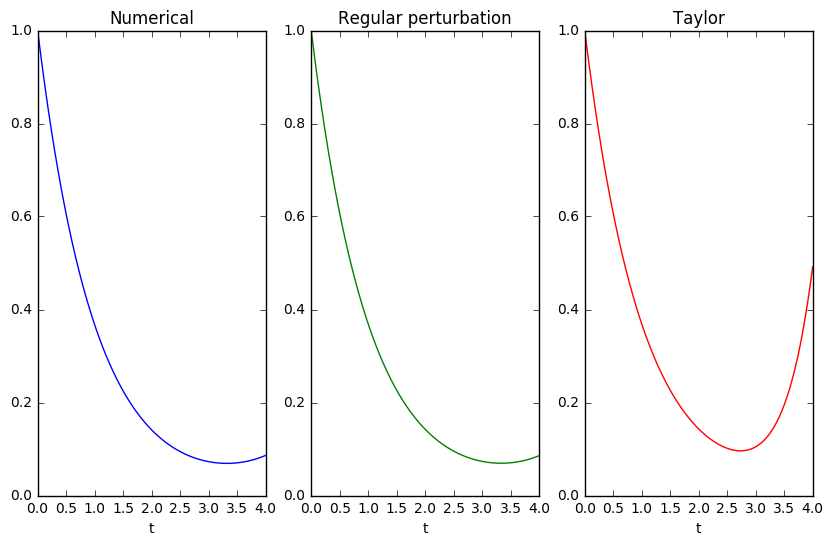

In [5]:
plt.figure(figsize=(10,6))
plt.subplot(1,3,1)
plt.plot(time_grid, sol[:,0], 'b-')
plt.title('Numerical')
plt.xlabel('t')
plt.subplot(1,3,2)
plt.plot(time_grid, u_regular_perturbation(time_grid), 'g-')
plt.title('Regular perturbation')
plt.xlabel('t')
plt.subplot(1,3,3)
plt.plot(time_grid, u_taylor(time_grid), 'r-')
plt.title('Taylor')
plt.xlabel('t')
plt.show()

## Question 3.

We want to perform a non-dimensionalization of the following IVP:


\begin{align}
m \frac{d^2 x}{d \tau^2} &= -a x \left| \frac{d x}{d \tau} \right| - k x \\
x(0) &= 0 \\
x'(0) &= V.
\end{align}


For simplicity we will write the ODE as:


$$
 \frac{d^2 x}{d \tau^2} = -\underbrace{\frac{a}{m}}_{\alpha} x \bigg| \frac{d x}{d \tau} \bigg| - \underbrace{\frac{k}{m}}_{\beta} x
$$


The corresponding units of measurement are:


\begin{align}
\alpha & \Rightarrow  \ \left[ \frac{1}{m \cdot s} \right] \\
\beta & \Rightarrow  \ \left[ \frac{1}{s^2} \right] \\
V & \Rightarrow  \ \left[ \frac{m}{s} \right]
\end{align}


This suggest the following time and space scalings:


\begin{align}
t &= \frac{\tau}{\sqrt{\beta^{-1}}} = \sqrt{\beta} \tau \\
y &= \frac{x}{V/ \sqrt{\beta}} = \frac{\sqrt{\beta}}{V} x.
\end{align}


Then, the derivatives of $x(\tau)$ can be rewritten in terms of y(t) as shown below:


\begin{align}
\frac{d x(\tau)}{d \tau} &= \frac{V}{\sqrt{\beta}} \frac{dy}{dt} \underbrace{\frac{dt}{d\tau}}_{\sqrt{\beta}} = V \frac{dy}{dt} \\
\frac{d^2 x(\tau)}{d\tau^2} &= V \frac{d^2 y}{dt^2} \underbrace{\frac{dt}{d\tau}}_{\sqrt{\beta}} = V \sqrt{\beta} \frac{d^2y}{dt^2 },
\end{align}


and replacing these results on the original ODE results:


$$
V \sqrt{\beta} \frac{d^2 y}{dt ^2} = - \alpha \frac{V}{\sqrt{\beta}} y \ \bigg| V \frac{dy}{dt} \bigg| - \beta \frac{V}{\sqrt{\beta}} y \ \ \ \leftrightarrow \ \ \ \frac{d^2 y}{dt^2} = - \frac{\alpha V}{\beta} y \bigg| \frac{dy}{dt} \bigg| - y
$$


Since $\alpha = \frac{a}{m}$ and $\beta = \frac{k}{m}$, then $\frac{\alpha V}{\beta} = V \frac{a/m}{k/m} = \frac{V a}{k} = \eta$.  For the initial conditions we note that:


\begin{align}
x(\tau = 0) &= \frac{V}{\sqrt{\beta}} y{t=0} = 0 \ \Rightarrow y(0) = 0 \\
\frac{dx}{d \tau}\bigg|_{\tau=0} &= V \frac{dy}{dt}\bigg|_{t=0} = V \ \Rightarrow y'(0) = 1.
\end{align}


Finally, the non-dimensionalization of the problem gives as result:


\begin{align}
\frac{d^2 y}{dt^2} &= - \eta y \bigg| \frac{dy}{dt} \bigg| - y \ , \ \ \ \text{with} \ \eta = \frac{V a}{k} \\
y(0) &= 0 \\
y'(0) &=1.
\end{align}


### Bonus: Numerical Methods Approach

Here we solve the ODE with the standard Euler method. In order to solve it with that method, we need to build the corresponding system of linear ODEs. If we define $y_1(t)=y(t)$ and $y_2(t)=y'(t)$, then $y_1'(t)=y_2(t)$ and $y_2'(t)= -\eta y_1(t) \ |y_2(t)| - y_1(t)$. The code below implements the Euler method for solving the system:
\begin{align}
y_1'(t) &= y_2(t) \\
y_2'(t) &= -\eta y_1(t) \ |y_2(t)| - y_1(t) \\
y_1(0) &= 0 \\
y_2(0) &= 1
\end{align}

In [6]:
# we keep the name epsilon for simplicity (it actually corresponds to eta)
def F2(x, t, eta=0.01):
    return np.array([x[1], -eta*x[0]*np.abs(x[1]) - x[0]])

def euler_int(F, x0, time_grid, epsilon=0.01):
    n = len(x0)
    n_iter = len(time_grid)
    h = time_grid[1]-time_grid[0]
    x = np.zeros((n_iter, n))
    x[0] = x0
    for i in range(1, n_iter):
        x[i] = F(x[i-1], time_grid[i], epsilon)*h + x[i-1]
    return x

In [9]:
h = 0.01
time_grid = np.arange(0., 100.01, h,)
sol = euler_int(F2, np.array([0,1]), time_grid, epsilon=0.01)

The below plot shows the dynamic of the system: An oscilatory mass-spring configuration, with an external perturbation that produces an increasing amplitude in time.

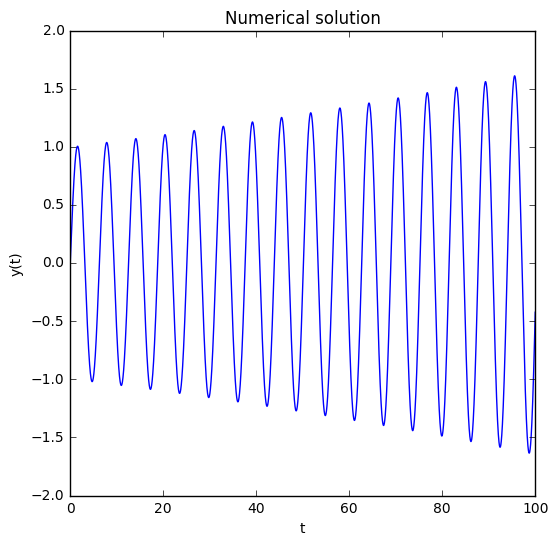

In [10]:
plt.figure(figsize=(6,6))
plt.plot(time_grid, sol[:,0], 'b-')
plt.title('Numerical solution')
plt.xlabel('t')
plt.ylabel('y(t)')
plt.show()

## Question 4.

We first start with a regular perturbation approximation $x \approx x_0 + \epsilon x_1 + \cdots$, by replacing it in the equation $\epsilon^2 x^3 + x^2 + 2 x + \epsilon = 0$:


$$
\epsilon^2 (x_0 + \epsilon x_1 + \cdots)^3 + 2(x_0 + \epsilon x_1 + \cdots) + 2 (x_0 + \epsilon x_1 + \cdots) + \epsilon = 0  
$$


Grouping terms of the same order:


\begin{align}
O(1): & \ x_0^2 + 2 x_0 = 0 \ \ \Rightarrow x_0 = 0 \ \ \text{and} \ \ x_0 =-2 \\
O(\epsilon): & \ 2x_0 x_1 + 2 x_1 + 1  = 0 \ \ \Rightarrow x_1 = -\frac{1}{2} \ \ \text{and} \ \ x_1 = \frac{1}{2}
\end{align}


And then we get approximate solutions:
$$
x \approx - \frac{\epsilon}{2} \ \ \ \text{and} \ \ \ x \approx  -2 + \frac{\epsilon}{2}.
$$


**Note:** The implicit assumption of the regular approach is that $x^2,2x,\epsilon  \gg \epsilon^2 x^3$. The third root should be found when $\epsilon^2 x^3$ is not a negligible term. By **dominant balancing** analysis between $\epsilon^2 x^3$ and the remaining terms, we find that:


$$
\epsilon^2 x^3 \sim x^2, \ \ \text{and} \ \ \epsilon^2 x^3, x^2 \gg 2x, \epsilon \ \ \text{lead us to} \ \ x \sim \frac{1}{\epsilon^2},
$$


and then $O(\epsilon^2 x^3) = \frac{1}{\epsilon^4}$, $O(x^2) = \frac{1}{\epsilon^4}$, $O(2x) = \frac{1}{\epsilon^2}$ and $O(\epsilon) = \epsilon$, which is coherent with the starting assumption (all the other balancing combinations lead to contradictions).


This suggest the scaling $y = \frac{x}{1/\epsilon^2} = \epsilon^2 x$. Replacing it in the original equation:


\begin{align}
\epsilon^2 \left( \frac{y}{\epsilon^2} \right)^3 + \left( \frac{y}{\epsilon^2} \right)^2 + 2 \left( \frac{y}{\epsilon^2} \right) + \epsilon &= 0 \ \ \ / \cdot \epsilon^4 \\
y^3 + y^2 + 2 \epsilon^2 y + \epsilon^5 &= 0.
\end{align}


If we apply regular perturbation $y = y_0 + \epsilon y_1 + \cdots $ to the equation above:


$$
(y_0 + \epsilon y_1 + \cdots)^3 + (y_0 + \epsilon y_1 + \cdots)^2 + 2 \epsilon^2 (y_0 + \epsilon y_1 + \cdots) + \epsilon^5 = 0
$$


and grouping terms of the same order:


\begin{align}
O(1) : & \ y_0^3 + y_0^2 = 0 \ \Rightarrow y_0 = -1, y_0 = 0, y_0 =0 \ \ \ \ \ \ (y_0 = 0 \ \text{discarded, since it lead us to the previous case})  \\
O(\epsilon) : & \ 3 y_0^2 y_1 + 2 y_0 y_1 = y_1 = 0.
\end{align}


Then, the third root is:


$$
y \approx y_0 + \epsilon y_1 = -1 \ \ \Rightarrow x \approx  -\frac{1}{\epsilon^2}.
$$

## Question 5.

The problem to be addressed is a BVP:

\begin{align}
\epsilon y'' + x^{1/3} y' + y &= 0 \\
y(0) &= 0 \\
y(1) &=  e^{-3/2}
\end{align}

As usual we first solve the problem with regular perturbation, i.e, assume that $\epsilon = 0$. We get the following leading order terms

\begin{align}
x^{1/3}y_0' + y_0 &= 0 \ \ \ \text{with} \ \ \ y_0(0) = 0 \ \ \Rightarrow y_0(x) = 0 \ \ (\text{trivial solution}) \\
x^{1/3}y_0' + y_0 &= 0 \ \ \ \text{with} \ \ \ y_0(1) = e^{-3/2} \ \ \Rightarrow y_0(x) = e^{-\frac{3}{2} x^{2/3}}
\end{align}

Since the resulting ODE is first order, and there are two boundary conditions, we test both of them and pick the non-trivial solution. Because it satisfies the left boundary condition, this solution will be the **outer approximation**:

$$
y_{\text{outer}}(x) = e^{-\frac{3}{2} x^{2/3}}.
$$

In order to find the **inner** solution, a proper space scaling near $x=0$ is needed

$$
\xi = \frac{x}{\delta(\epsilon)} \ \  \Rightarrow \ \ Y(\xi) = y(x) = y(\delta(\epsilon) \xi), 
$$

and then, rescaling the ODE we get

$$
\epsilon y'' + x^{1/3} y' + y = 0 \ \ \Rightarrow  \ \ \frac{\epsilon}{\delta(\epsilon)^2} Y''(\xi) + \frac{1}{\delta(\epsilon)^{2/3}} \sqrt[3]{\xi} Y'(\xi) + Y(\xi) = 0
$$

Since in the outer solution we take out the second order derivative term, now we need to keep it. Then, there are two cases:

1. $\displaystyle \frac{\epsilon}{\delta(\epsilon)^2} \sim \frac{1}{\delta(\epsilon)^{2/3}}$ and $1$ is small in comparison. 
2. $\displaystyle \frac{\epsilon}{\delta(\epsilon)^2} \sim 1$ and $\delta(\epsilon)^{2/3}$ is small in comparison.

The first case $\displaystyle \frac{\epsilon}{\delta(\epsilon)^2} = \frac{1}{\delta(\epsilon)^{2/3}}$ lead us to $\delta(\epsilon) = \epsilon^{3/4}$. Then the terms have the same order $\displaystyle \frac{\epsilon}{\delta(\epsilon)^2} \sim \frac{1}{\sqrt{\epsilon}}$, $\displaystyle \frac{1}{\delta(\epsilon)^{2/3}} \sim \frac{1}{\sqrt{\epsilon}}$, and both much greater than $1$ when $\epsilon \rightarrow 0$. 

The second case lead us to $\delta(\epsilon) = \sqrt{\epsilon}$, but then $\delta(\epsilon)^{2/3} \sim \epsilon^{1/3}$ is not small as $\epsilon \rightarrow 0$.

Replacing $\delta(\epsilon) = \epsilon^{3/4}$ in the rescaled ODE, and reordering terms:

\begin{align}
\underbrace{\frac{\epsilon}{(\epsilon^{3/4})^{2}}}_{1/\sqrt{\epsilon}} Y''(\xi) + \underbrace{\frac{1}{(\epsilon^{3/4})^{2/3}}}_{1/ \sqrt{\epsilon}} \sqrt[3]{\xi} Y'(\xi) + Y(\xi) &= 0 \\
Y''(\xi) +  \sqrt[3]{\xi} Y'(\xi) + \sqrt{\epsilon} Y(\xi) &= 0
\end{align}

Applying regular perturbation to the previous equation, and taking just the leading order terms:

$$
O(1): Y_0''(\xi) + \xi^{1/3} Y'(\xi) = 0  \ \ \  \ \ \text{with} \ \ y(0)=0 \ \ \Rightarrow Y(0) = 0, 
$$

gives us as result

$$
Y_0(\xi) = c_1 \left(1.14038\, -\frac{0.930605 \ \xi \ \Gamma \left(0.75,0.75 \xi^{4/3}\right)}{\left(\xi^{4/3}\right)^{3/4}}\right)
$$

We note that $\lim_{\xi 0^{+}} Y_0(\xi) = 0$ (see attached `Mathematica` notebook). Then we can write $Y_0(\xi)$ in a more convenient way (with no singularities) as follow:

\begin{equation} 
Y_0(\xi) = 
 \begin{cases} 
      c_1 \left(1.14038\, - 0.930605 \  \Gamma \left(0.75,0.75 \xi^{4/3}\right)\right) &  \xi > 0 \\
      0 & \xi = 0 
   \end{cases}
\end{equation}

And returning to the original variables, we get the inner approximation:
\begin{align}
y_{\text{inner}}(x) = 
\begin{cases}
    c_1 \left(1.14038\, - 0.930605 \  \Gamma \left(0.75,0.75 \frac{x^{4/3}}{\epsilon}\right)\right) &  x > 0 \\
    0 & x = 0 
\end{cases}
\end{align}

Moreover, I was unable to find a proper intermediate variable $\eta$ between $O(\epsilon)$ and $O(1)$, to find a uniform approximation. Different alternatives were tested as you can see in the final part of the attached `Mathematica` notebook.